In [1]:
#Bliotecas Padrão
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

#Keras - CNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

#Bibliotecas Adicionais
import seaborn as sns #Grafico
from pathlib import Path #Diretorio
from tqdm import tqdm #Barra de Progressao



In [2]:
data = loadmat('dispersionpoints.mat')
print(data.keys())

data_lambda = data['lamda1']

#First and last run preview
print('\n===== Sample Simulação # 1 =====')
display(data_lambda[:,:,0])

print('\n===== Sample Simulação # 100 =====')
display(data_lambda[:,:,99])

#Espessura
print('\n===== Preview Espessura =====')
ESP = data['ESP'].reshape(-1,)
print(ESP.shape)
display(ESP)

#frequências normalizadas
x1 = data['x1']
print(f'Dimensao do Parametro X :{x1.shape}')
display(x1)

dict_keys(['__header__', '__version__', '__globals__', 'ESP', 'lamda1', 'x1'])

===== Sample Simulação # 1 =====


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.68424850e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.33633598e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.26254997e-01, 1.00671452e+00, 1.02473435e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.26877362e-01, 1.00802210e+00, 1.02609304e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.27499826e-01, 1.00933069e+00, 1.02745084e+00]])


===== Sample Simulação # 100 =====


array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 5.06806211e-253, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 1.01322291e-252, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        4.06197666e-001, 4.24970087e-001, 2.54093240e-001],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        4.06926305e-001, 4.25343292e-001, 2.54330546e-001],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        4.07653070e-001, 4.25716238e-001, 2.54567746e-001]])


===== Preview Espessura =====
(100,)


array([0.03  , 0.0298, 0.0296, 0.0294, 0.0292, 0.029 , 0.0288, 0.0286,
       0.0284, 0.0282, 0.028 , 0.0278, 0.0276, 0.0274, 0.0272, 0.027 ,
       0.0268, 0.0266, 0.0264, 0.0262, 0.026 , 0.0258, 0.0256, 0.0254,
       0.0252, 0.025 , 0.0248, 0.0246, 0.0244, 0.0242, 0.024 , 0.0238,
       0.0236, 0.0234, 0.0232, 0.023 , 0.0228, 0.0226, 0.0224, 0.0222,
       0.022 , 0.0218, 0.0216, 0.0214, 0.0212, 0.021 , 0.0208, 0.0206,
       0.0204, 0.0202, 0.02  , 0.0198, 0.0196, 0.0194, 0.0192, 0.019 ,
       0.0188, 0.0186, 0.0184, 0.0182, 0.018 , 0.0178, 0.0176, 0.0174,
       0.0172, 0.017 , 0.0168, 0.0166, 0.0164, 0.0162, 0.016 , 0.0158,
       0.0156, 0.0154, 0.0152, 0.015 , 0.0148, 0.0146, 0.0144, 0.0142,
       0.014 , 0.0138, 0.0136, 0.0134, 0.0132, 0.013 , 0.0128, 0.0126,
       0.0124, 0.0122, 0.012 , 0.0118, 0.0116, 0.0114, 0.0112, 0.011 ,
       0.0108, 0.0106, 0.0104, 0.0102])

Dimensao do Parametro X :(1499, 100)


array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.00000e-03, 2.98000e-03, 2.96000e-03, ..., 1.06000e-03,
        1.04000e-03, 1.02000e-03],
       [6.00000e-03, 5.96000e-03, 5.92000e-03, ..., 2.12000e-03,
        2.08000e-03, 2.04000e-03],
       ...,
       [4.48800e+00, 4.45808e+00, 4.42816e+00, ..., 1.58576e+00,
        1.55584e+00, 1.52592e+00],
       [4.49100e+00, 4.46106e+00, 4.43112e+00, ..., 1.58682e+00,
        1.55688e+00, 1.52694e+00],
       [4.49400e+00, 4.46404e+00, 4.43408e+00, ..., 1.58788e+00,
        1.55792e+00, 1.52796e+00]])

In [3]:
df_lambda = pd.DataFrame(data_lambda[:,23:39,50], columns = range(23,39))
df_lambda.describe()

,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


In [4]:
for simulacao in range(0,100):
    df_lambda = pd.DataFrame(data_lambda[:,23:39,50], columns = range(23,39))
    print(f'############ {simulacao} ###############')
    display(df_lambda.describe())

############ 0 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 1 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 2 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 3 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 4 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 5 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 6 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 7 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 8 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 9 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 10 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 11 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 12 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 13 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 14 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 15 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 16 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 17 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 18 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 19 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 20 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 21 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 22 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 23 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 24 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 25 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 26 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 27 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 28 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 29 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 30 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 31 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 32 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 33 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 34 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 35 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 36 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 37 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 38 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 39 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 40 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 41 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 42 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 43 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 44 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 45 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 46 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 47 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 48 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 49 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 50 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 51 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 52 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 53 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 54 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 55 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 56 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 57 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 58 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 59 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 60 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 61 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 62 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 63 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 64 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 65 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 66 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 67 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 68 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 69 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 70 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 71 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 72 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 73 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 74 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 75 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 76 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 77 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 78 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 79 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 80 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 81 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 82 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 83 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 84 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 85 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 86 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 87 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 88 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 89 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 90 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 91 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 92 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 93 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 94 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 95 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 96 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 97 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 98 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


############ 99 ###############


,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1499.0,1.499000e+03,1.499000e+03,1.499000e+03,1.499000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.139348e-41,1.952995e-38,5.357416e-36,1.182903e-38
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764098e-39,7.533420e-37,2.059166e-34,4.579771e-37
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070174e-37,2.916696e-35,7.972391e-33,1.773146e-35


#### Grafico

In [ ]:
#path = Path.cwd()

#simulacao = 0
resolucao = 128
for simulacao in tqdm(range(0,100), 'Progress'):
    for column in range(0,66):
        plt.figure(simulacao,figsize=(resolucao,resolucao))
        plt.scatter(data_lambda[:,column,simulacao],x1[:,simulacao], s = 128)
        plt.xlim([0,1.6])
        plt.ylim([0,4.5])
    plt.savefig(fr'C:\Users\dmarins2\Pictures\Graphs\{resolucao}x{resolucao}\GRAPH_SIMULATION_{simulacao}.png')
    #print(f'GRAPH_SIMULATION_{simulacao} DONE \n')
    #print(f'{simulacao}/99')
    if simulacao == 0:
        plt.title(f'Graph for Simulation {simulacao}', fontsize = resolucao)
        plt.ylabel('Frequency MHz x mm', fontsize = resolucao)
        plt.xlabel('h / lambda', fontsize = resolucao)
    else:
        plt.close()

## CNN

##### Carregamento de imagens

In [5]:
import numpy as np
import glob
from PIL import Image

# Definir caminho para conjunto de dados de treinamento
#path = '/path/to/your/training/dataset/*.png'

resolution = 64
path = fr'C:\Users\dmarins2\Pictures\Graphs\{resolution}x{resolution}\*.png'
resolution = resolution*4

# Carregar imagens como arrays numpy
imgs = []
labels = []
for i, image_path in enumerate(glob.glob(path)):
    img = Image.open(image_path)
    img = img.resize((resolution*2, resolution*2))
    img = np.array(img) / 255.
    imgs.append(img)
    labels.append(i)

# Converter listas em arrays numpy
imgs = np.array(imgs)
labels = np.array(ESP)

imgs.shape

(100, 2048, 2048, 4)

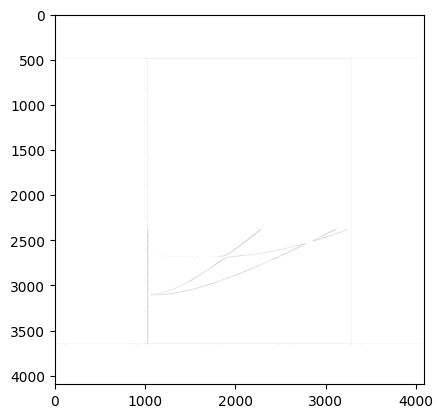

In [15]:
sample_image = imgs[90]
sample_image = np.array(sample_image, dtype='float')
pixels = sample_image.reshape((resolution*4, resolution*4))
plt.imshow(pixels, cmap='gray')
plt.show()

##### Criação de conjunto de treino e teste
usando Método de Monte Carlo

##### Definição de arquitetura do modelo CNN

In [7]:
import numpy as np
import random

random.seed(42)

def generate_new_samples(X,y, n_samples):
    X_samples = []
    y_samples = []
    for i in tqdm(range(n_samples)):
        
        random_index = np.random.randint(0, X.shape[0])
        X_samples.append(X[random_index])
        y_samples.append(y[random_index])
    return np.array(X_samples), np.array(y_samples)

# Generate new samples using Monte Carlo method
n_samples = 1000 - imgs.shape[0]
X_train, y_train = generate_new_samples(imgs, labels, n_samples)
print('OK 1')
# Combine the original samples and the new samples
X_augmented = np.concatenate([imgs, X_train], axis=0)
print('OK 2')
# Split the augmented dataset into training and testing sets
train_ratio = 0.8
train_size = int(X_augmented.shape[0] * train_ratio)
print('OK 3')
X_train = X_augmented[:train_size]
print('OK 4')
X_test = X_augmented[train_size:]

print("Tamanho do conjunto de treino: ", len(X_train))
print("Tamanho do conjunto de test: ", len(X_test))


100%|████████████████████████████████████████████████████████████████████████████| 900/900 [00:00<00:00, 299735.87it/s]


OK 1
OK 2
OK 3
OK 4
Tamanho do conjunto de treino:  800
Tamanho do conjunto de test:  200


In [8]:
print("Shape do conjunto de treino: ", X_train.shape)
print("Shape do conjunto de treino: ", X_test.shape)

Shape do conjunto de treino:  (800, 2048, 2048, 4)
Shape do conjunto de treino:  (200, 2048, 2048, 4)


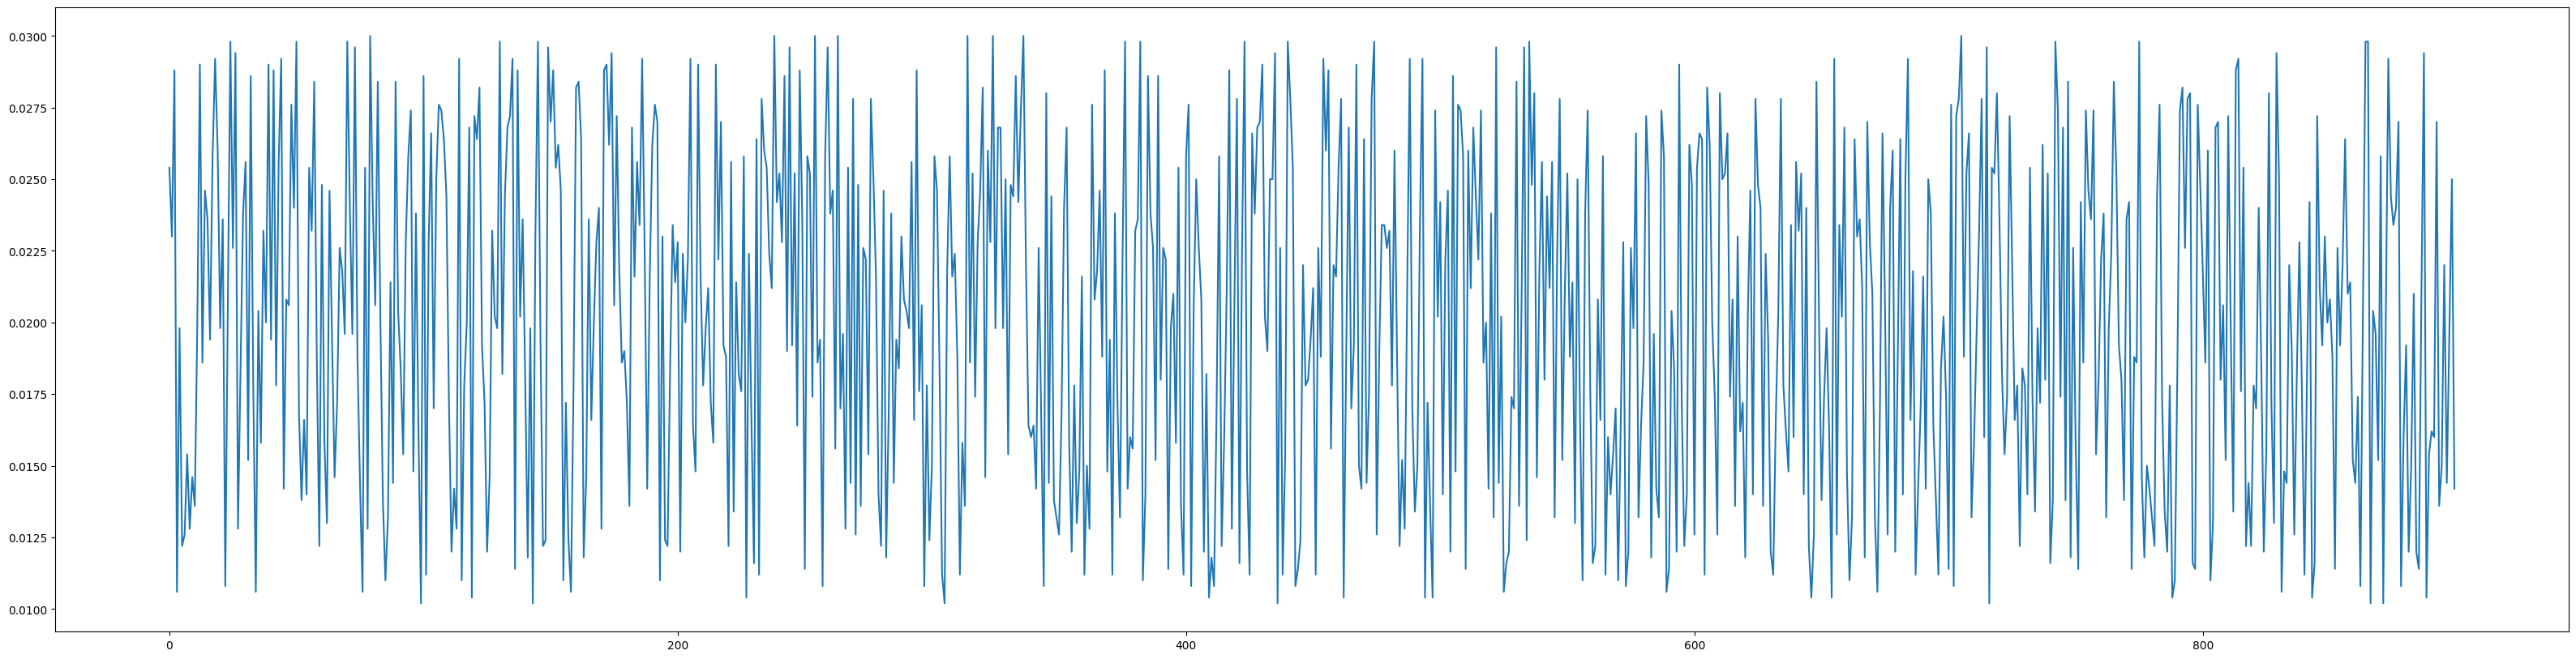

In [9]:
#Plot dos labels do conjunto de treinamento Gerado por Monte Carlo
plt.figure(figsize = (40,10))
plt.plot(range(0,900), y_train.reshape(-1,))

#### Treino e Validação do Modelo CNN

In [13]:
#Criação do modelo
model = keras.Sequential()

#Adição da camada de convolução
model.add(keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],4)))

#Adição da camada de pooling
model.add(keras.layers.MaxPooling2D((2,2)))

#Adição de mais camadas de convolução e pooling (opcional)
model.add(keras.layers.Conv2D(16, (5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

#Adição da camada fully connected para classificação
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dense(1))

model.summary()

#Compilação do modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

#Adição do callback de early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

#Treinamento do modelo
history = model.fit(X_train, y_train, validation_split = 0.2, verbose = 1, epochs=8, callbacks=[early_stopping])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 2044, 2044, 6)     606       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1022, 1022, 6)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 1018, 1018, 16)    2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 509, 509, 16)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4145296)           0         
                                                                 
 dense_6 (Dense)             (None, 120)              

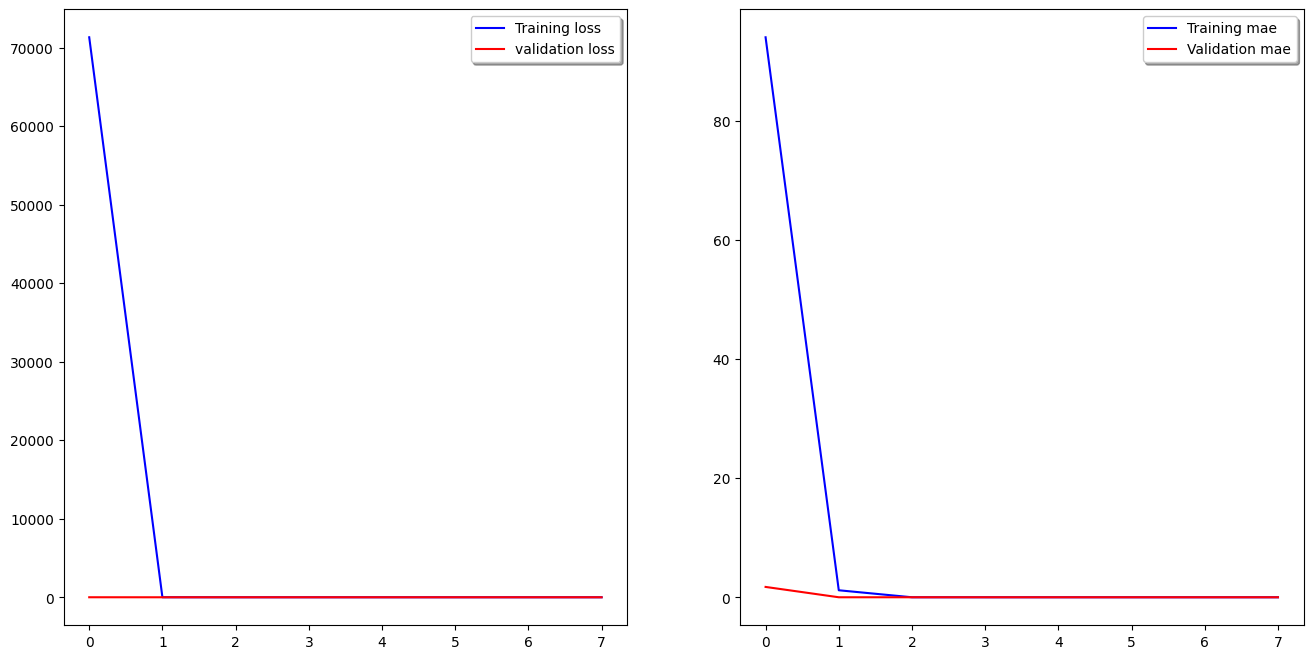

In [14]:
# Guardar el Modelo
model.save('CNN_model.h5')

#Load
#model = keras.model.load_model('CNN_model.h5')

fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['mean_absolute_error'], color='b', label="Training mae")
ax[1].plot(history.history['val_mean_absolute_error'], color='r',label="Validation mae")
legend = ax[1].legend(loc='best', shadow=True)